In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
data=pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [3]:
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
107,108,Male,54,63,46
18,19,Male,52,23,29
22,23,Female,46,25,5
128,129,Male,59,71,11
178,179,Male,59,93,14


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.duplicated().sum()

0

No null ,duplicated values so no worries

In [6]:
X=data.drop(columns=['CustomerID'])

removed the unwanted row

In [7]:
X['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [8]:
X.shape

(200, 4)

In [9]:
X['Gender']=np.where(X['Gender']=='Male',1,0)


changed the male to 1 and female to 0 since i want all the columns to be as integers

In [10]:
X.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


In [11]:
from sklearn.decomposition import PCA 

Applying PCA to reduce the dimentions of the data i.e for better graph representation and no ambiquity

In [12]:
PCA=PCA(n_components=3,random_state=42)

In [13]:
X=PCA.fit_transform(X)

In [14]:
from sklearn.cluster import KMeans

In [15]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

Estimating a good number of clusters for best clustering ELBOW Method


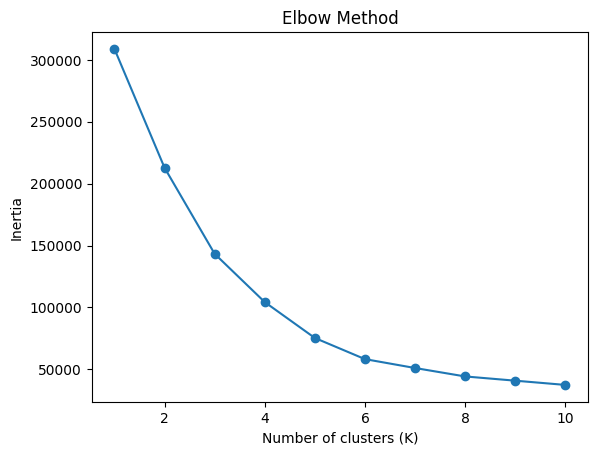

In [16]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


Sharp Edge is likely to be at 5th cluster


In [17]:
kmeans = KMeans(n_clusters=5, random_state=42,n_init=10)
kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [18]:
centroids

array([[-44.38675468, -10.05043814,  -0.72395279],
       [ 41.55103875,   1.87087541,   1.48945461],
       [ -9.62171017,  40.2873859 ,  -5.77474428],
       [ -4.47177012,  -3.86864837,   4.04653779],
       [  4.98536192, -46.67336912,  -6.70221648]])

In [19]:
df = pd.DataFrame(X, columns=["PC1", "PC2","PC3"])

DATA INTO 3D-GRAPH

In [20]:
import plotly.express as px
import plotly.graph_objects as go
px.scatter()
fig=px.scatter_3d(df,x="PC1",y="PC2", z="PC3",color=labels.astype(str))
fig.add_trace(go.Scatter3d(
    x=centroids[:, 0],
    y=centroids[:, 1],
    z=centroids[:, 2],
    mode='markers',
    marker=dict(
        color='black',
        size=8,
        symbol='x'
    ),
    name='Centroids'
))
fig.show()

here the black cross represents the centroids of the cluster and the same coloured points belong to the same cluster